In [8]:
import pandas as pd


df = pd.read_csv('../data/raw/vestiaire.csv')


print(df.head())


   product_id            product_type  \
0    43247626         Wool mini skirt   
1    43247441                  Jacket   
2    43246517               Wool coat   
3    43246507              Mini skirt   
4    43246417  Vegan leather trousers   

                                        product_name  \
0  Wool mini skirt Miu Miu Grey size S Internatio...   
1      Jacket Barbara Bui Navy size 42 FR in Cotton    
2  Wool coat Comme Des Garcons White size S Inter...   
3     Mini skirt MSGM Black size 38 IT in Polyester    
4  Vegan leather trousers LVIR Black size 36 FR i...   

                                 product_description  \
0  Miu Miu – Pleated mini skirt Size: 36 (S)  Wai...   
1  For selling nice women's suit Barbara Bui size...   
2  Magnificent boiled wool coat. I bought it in t...   
3  MSGM Skirt Black Printed Raw-Edge & Embroidere...   
4  LVIR black grained faux leather trousers size ...   

               product_keywords product_gender_target product_category  \
0    

In [9]:
!pip install pyarrow


In [10]:
# Save as a Parquet file (with compression for smaller size)
df.to_parquet('vestiaire.parquet', engine='pyarrow', compression='snappy')

print("CSV successfully converted to Parquet!")

CSV successfully converted to Parquet!


In [11]:
df = pd.read_parquet('../data/processed/vestiaire.parquet')


In [12]:
# Check for missing values in each column
print(df.isnull().sum())

product_id                         0
product_type                       0
product_name                       0
product_description                7
product_keywords                1183
product_gender_target              0
product_category                1183
product_season                     2
product_condition                  0
product_like_count                 0
sold                               0
reserved                           0
available                          0
in_stock                           0
should_be_gone                     0
brand_id                           0
brand_name                         0
brand_url                          0
product_material                   4
product_color                      1
price_usd                          0
seller_price                       0
seller_earning                     0
seller_badge                       0
has_cross_border_fees          13736
buyers_fees                    13736
warehouse_name                     0
s

In [13]:
# Set the range of classes to check (e.g., between 2 and 15)
min_classes = 2
max_classes = 15

# Columns to exclude from the check
exclude_columns = ['product_name', 'product_description', 'product_keywords', 'seller_id', 'seller_username']

# Identify categorical (string-type) columns within the desired range, excluding specified columns
categorical_columns = [col for col in df.select_dtypes(include='object').columns 
                       if col not in exclude_columns 
                       and min_classes <= df[col].nunique() <= max_classes]

# Display these columns and their unique value counts
for col in categorical_columns:
    print(f"Column: {col}, Unique Values: {df[col].nunique()}")
    print(df[col].value_counts(), "\n")

Column: product_gender_target, Unique Values: 2
product_gender_target
Women    482377
Men      418137
Name: count, dtype: int64 

Column: product_category, Unique Values: 6
product_category
Men Clothing         193082
Women Clothing       192197
Women Accessories    146018
Women Shoes          143833
Men Shoes            125425
Men Accessories       98776
Name: count, dtype: int64 

Column: product_season, Unique Values: 3
product_season
All seasons        748108
Autumn / Winter    114216
Spring / Summer     38188
Name: count, dtype: int64 

Column: product_condition, Unique Values: 5
product_condition
Very good condition     401142
Never worn              221316
Good condition          130546
Never worn, with tag    123122
Fair condition           24388
Name: count, dtype: int64 

Column: seller_badge, Unique Values: 3
seller_badge
Common     511080
Expert     222990
Trusted    166444
Name: count, dtype: int64 

Column: warehouse_name, Unique Values: 6
warehouse_name
Tourcoing    6284

*Encoding*

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Label Encoding: 'product_gender_target'
le = LabelEncoder()
df['product_gender_target'] = le.fit_transform(df['product_gender_target'])
# 'Women' → 1, 'Men' → 0

# 2. Frequency Encoding: 'product_category'
category_freq = df['product_category'].value_counts().to_dict()
df['product_category_encoded'] = df['product_category'].map(category_freq)

# 3. Ordinal Encoding: 'product_season'
season_order = ['All seasons', 'Autumn / Winter', 'Spring / Summer']
df['product_season_encoded'] = df['product_season'].astype('category')
df['product_season_encoded'] = df['product_season_encoded'].cat.set_categories(season_order, ordered=True).cat.codes
# 'All seasons' → 0, 'Autumn / Winter' → 1, 'Spring / Summer' → 2

# 4. Ordinal Encoding: 'product_condition'
condition_order = ['Fair condition', 'Good condition', 'Very good condition', 'Never worn', 'Never worn, with tag']
df['product_condition_encoded'] = df['product_condition'].astype('category')
df['product_condition_encoded'] = df['product_condition_encoded'].cat.set_categories(condition_order, ordered=True).cat.codes
# 'Fair condition' → 0, ..., 'Never worn, with tag' → 4

# 5. Ordinal Encoding: 'seller_badge'
badge_order = ['Common', 'Expert', 'Trusted']
df['seller_badge_encoded'] = df['seller_badge'].astype('category')
df['seller_badge_encoded'] = df['seller_badge_encoded'].cat.set_categories(badge_order, ordered=True).cat.codes
# 'Common' → 0, 'Expert' → 1, 'Trusted' → 2

# 6. Frequency Encoding: 'warehouse_name'
warehouse_freq = df['warehouse_name'].value_counts().to_dict()
df['warehouse_name_encoded'] = df['warehouse_name'].map(warehouse_freq)

# 7. Ordinal Encoding: 'usually_ships_within'
shipping_order = ['1-2 days', '3-5 days', '6-7 days', 'More than 7 days']
df['usually_ships_within_encoded'] = df['usually_ships_within'].astype('category')
df['usually_ships_within_encoded'] = df['usually_ships_within_encoded'].cat.set_categories(shipping_order, ordered=True).cat.codes
# '1-2 days' → 0, ..., 'More than 7 days' → 3


df.drop(['product_gender_target', 'product_category', 'product_season', 'product_condition', 
         'seller_badge', 'warehouse_name', 'usually_ships_within'], axis=1, inplace=True)

print(df.head())


   product_id            product_type  \
0    43247626         Wool mini skirt   
1    43247441                  Jacket   
2    43246517               Wool coat   
3    43246507              Mini skirt   
4    43246417  Vegan leather trousers   

                                        product_name  \
0  Wool mini skirt Miu Miu Grey size S Internatio...   
1      Jacket Barbara Bui Navy size 42 FR in Cotton    
2  Wool coat Comme Des Garcons White size S Inter...   
3     Mini skirt MSGM Black size 38 IT in Polyester    
4  Vegan leather trousers LVIR Black size 36 FR i...   

                                 product_description  \
0  Miu Miu – Pleated mini skirt Size: 36 (S)  Wai...   
1  For selling nice women's suit Barbara Bui size...   
2  Magnificent boiled wool coat. I bought it in t...   
3  MSGM Skirt Black Printed Raw-Edge & Embroidere...   
4  LVIR black grained faux leather trousers size ...   

               product_keywords  product_like_count   sold  reserved  \
0      

In [15]:
# Check for missing values in each column
print(df.isnull().sum())

product_id                          0
product_type                        0
product_name                        0
product_description                 7
product_keywords                 1183
product_like_count                  0
sold                                0
reserved                            0
available                           0
in_stock                            0
should_be_gone                      0
brand_id                            0
brand_name                          0
brand_url                           0
product_material                    4
product_color                       1
price_usd                           0
seller_price                        0
seller_earning                      0
has_cross_border_fees           13736
buyers_fees                     13736
seller_id                           0
seller_username                    39
seller_country                      0
seller_products_sold                0
seller_num_products_listed          0
seller_commu

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   product_id                    900514 non-null  int64  
 1   product_type                  900514 non-null  object 
 2   product_name                  900514 non-null  object 
 3   product_description           900507 non-null  object 
 4   product_keywords              899331 non-null  object 
 5   product_like_count            900514 non-null  float64
 6   sold                          900514 non-null  bool   
 7   reserved                      900514 non-null  bool   
 8   available                     900514 non-null  bool   
 9   in_stock                      900514 non-null  bool   
 10  should_be_gone                900514 non-null  bool   
 11  brand_id                      900514 non-null  int64  
 12  brand_name                    900514 non-nul

In [17]:
# Identify columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:\n", missing_cols)

# Examine non-null values for each column with missing values
for col in missing_cols:
    print(f"\nColumn: {col}")
    print(df[col].dropna().value_counts().head(10))  # Display the 10 most frequent non-null values


Columns with missing values:
 ['product_description', 'product_keywords', 'product_material', 'product_color', 'has_cross_border_fees', 'buyers_fees', 'seller_username', 'product_category_encoded']

Column: product_description
product_description
Very good condition              2185
abrigo burberry vintage y2k      1169
New                              1099
Never worn                       1028
Good condition                    944
CHAQUETA BURBERRY VINTAGE Y2K     658
Made in Italy                     410
In very good condition            360
Very good state                   345
camisa burberry vintage y2k       337
Name: count, dtype: int64

Column: product_keywords
product_keywords
Gucci Plastic Sunglasses                           4078
Hermès Silk Scarves                                2513
Hermès Silk Ties                                   2441
Burberry Cotton Coats                              2347
Prada Plastic Sunglasses                           2184
Gucci Leather Trainers  

In [18]:
#encode has_cross_border_fees
# Step 1: Fill missing values with False
df['has_cross_border_fees'].fillna(False, inplace=True)

# Step 2: Label Encode the column (True → 1, False → 0)
le = LabelEncoder()
df['has_cross_border_fees_encoded'] = le.fit_transform(df['has_cross_border_fees'])

# Step 3: Drop the original column
df.drop('has_cross_border_fees', axis=1, inplace=True)

# Verify the change
print(df[['has_cross_border_fees_encoded']].head())

   has_cross_border_fees_encoded
0                              0
1                              1
2                              1
3                              1
4                              1


/var/folders/mt/7wg45jq50jdbqy4g39cqxf6c0000gn/T/ipykernel_11182/2394545758.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['has_cross_border_fees'].fillna(False, inplace=True)
/var/folders/mt/7wg45jq50jdbqy4g39cqxf6c0000gn/T/ipykernel_11182/2394545758.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  

In [19]:
#imputing missing product_color values

import re
import numpy as np

# Step 1: Drop rows where product_description is null
df.dropna(subset=['product_description'], inplace=True)

# ✅ Step 2: List of colors to extract
color_list = [
    "black", "white", "red", "blue", "green", "yellow", "pink", "grey", "gray", "purple",
    "orange", "brown", "beige", "gold", "silver", "navy", "multicolour", "burgundy",
    "ivory", "cream", "maroon", "khaki", "teal", "olive", "bronze", "turquoise"
]

# Create a regex pattern to match colors (case-insensitive)
color_pattern = re.compile(r'\b(?:' + '|'.join(color_list) + r')\b', re.IGNORECASE)

# Step 3: Function to extract the first matching color from product_description
def extract_color(description):
    match = color_pattern.search(description)
    return match.group(0).lower() if match else np.nan

# Step 4: Fill missing product_color using extracted colors
df.loc[df['product_color'].isna(), 'product_color'] = df.loc[df['product_color'].isna(), 'product_description'].apply(extract_color)

# Step 5: Check remaining missing values in product_color
print("Remaining null values in 'product_color':", df['product_color'].isna().sum())

# Step 6: Verify changes
print(df[['product_description', 'product_color']].sample(10))


Remaining null values in 'product_color': 0
                                      product_description product_color
747070  These loafers from Tods are worth the investme...         Brown
353304  Brioni zip up sweater. 69% silk 31% wool. Blac...         Black
515017  Beautiful vintage Chanel scarf in beige and oc...         Beige
673307  Guidi Rosellini Orlando 1896 EU 44 Mens Brown ...         Brown
136446  CHRISTIAN DIOR 2022 Runway L'union fait la For...         Beige
558700  Silk scarf used a couple of times - length 100...          Grey
337114  Nike Sportswear Tech Fleece Jogger Pink Navy M...          Pink
282355  Vintage Natraji Embroidered Jacket Pattern Suk...   Multicolour
679330  VANS VANS sneakers - Black LACE-UP SPORTS SHOE...         Black
163014                               Beautiful maxi dress         Camel


In [20]:
# Step 7: Label Encoding for 'product_color'
label_encoder = LabelEncoder()
df['product_color_encoded'] = label_encoder.fit_transform(df['product_color'])

# Step 8: Map encoded labels back to original colors (for reference)
color_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Color Mapping (Original -> Encoded):", color_mapping)

# Step 9: Confirm encoding
print(df[['product_color', 'product_color_encoded']].head(10))

Color Mapping (Original -> Encoded): {'Anthracite': np.int64(0), 'Beige': np.int64(1), 'Beige / Grey': np.int64(2), 'Black': np.int64(3), 'Blue': np.int64(4), 'Bordeaux': np.int64(5), 'Brown': np.int64(6), 'Burgundy': np.int64(7), 'Camel': np.int64(8), 'Charcoal': np.int64(9), 'Ecru': np.int64(10), 'Gold': np.int64(11), 'Green': np.int64(12), 'Grey': np.int64(13), 'Khaki': np.int64(14), 'Metallic': np.int64(15), 'Multicolour': np.int64(16), 'Navy': np.int64(17), 'Orange': np.int64(18), 'Pink': np.int64(19), 'Purple': np.int64(20), 'Red': np.int64(21), 'Silver': np.int64(22), 'Turquoise': np.int64(23), 'White': np.int64(24), 'White / Black': np.int64(25), 'Yellow': np.int64(26), 'black': np.int64(27), 'brown/black': np.int64(28), 'camel': np.int64(29), 'silver/black': np.int64(30)}
  product_color  product_color_encoded
0          Grey                     13
1          Navy                     17
2         White                     24
3         Black                      3
4         Bla

In [21]:
df.isnull().sum()[df.isnull().sum() > 0]

product_keywords             1183
product_material                4
buyers_fees                 13736
seller_username                39
product_category_encoded     1183
dtype: int64

In [22]:
df.dropna(subset=['seller_username'], inplace=True)


In [23]:
df.dropna(subset=['product_material'], inplace=True)


In [24]:
df.dropna(subset=['product_keywords'], inplace=True)


In [25]:
df.isnull().sum()[df.isnull().sum() > 0]

buyers_fees    13727
dtype: int64

In [26]:
# Check the range of buyer fees
print("Minimum buyers_fees:", df['buyers_fees'].min())
print("Maximum buyers_fees:", df['buyers_fees'].max())

# Or use describe() for a more detailed summary
print(df['buyers_fees'].describe())


Minimum buyers_fees: 0.0
Maximum buyers_fees: 105435.0
count    885554.000000
mean         55.528420
std         290.456913
min           0.000000
25%          11.720000
50%          24.000000
75%          50.560000
max      105435.000000
Name: buyers_fees, dtype: float64


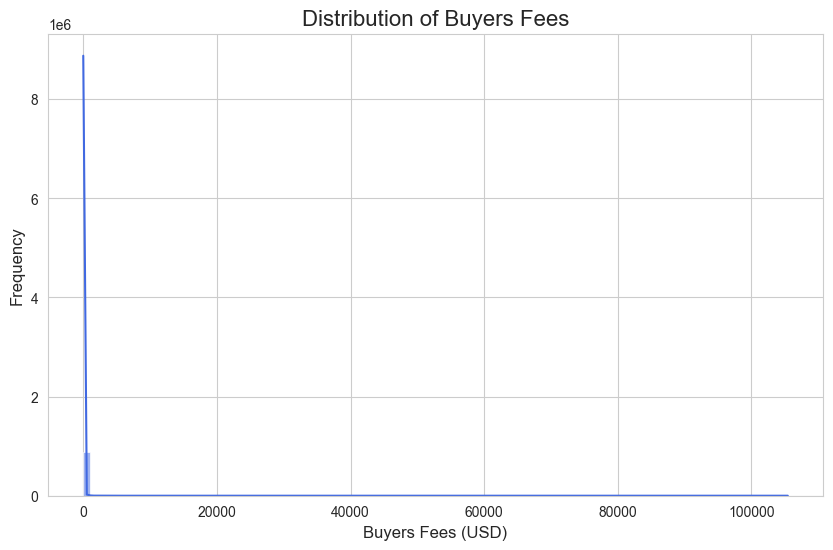

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot distribution of buyers_fees
sns.histplot(df['buyers_fees'], bins=100, kde=True, color='royalblue')

# Add labels and title
plt.title('Distribution of Buyers Fees', fontsize=16)
plt.xlabel('Buyers Fees (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show plot
plt.show()


Highly skewed distribution so using iterative imputation to handle this column.

For knn imputation, we first check feature importance by setting buyers_fees as target with random forest, and then using those features to do knn imputation.

In [28]:
#find all string type columns in dataset
string_columns = df.select_dtypes(include='object').columns.tolist()

print("String columns in the dataset:")
print(string_columns)

String columns in the dataset:
['product_type', 'product_name', 'product_description', 'product_keywords', 'brand_name', 'brand_url', 'product_material', 'product_color', 'seller_username', 'seller_country']


In [29]:
#label encode important string columns
from sklearn.preprocessing import LabelEncoder

# Columns to label encode
label_encode_cols = ['product_type', 'brand_name', 'product_material', 'product_color', 'seller_country']

# Initialize LabelEncoder
label_encoders = {}

for col in label_encode_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Store encoder for future inverse transform if needed

print("Label encoding complete!")


Label encoding complete!


                          Feature  Importance
9                       price_usd    0.595814
11                 seller_earning    0.256159
10                   seller_price    0.060765
12                 seller_country    0.039274
22         warehouse_name_encoded    0.010989
1              product_like_count    0.007160
16           seller_num_followers    0.006386
13           seller_products_sold    0.005631
14     seller_num_products_listed    0.003370
17               seller_pass_rate    0.003166
21           seller_badge_encoded    0.002179
15          seller_community_rank    0.001804
20      product_condition_encoded    0.001463
25          product_color_encoded    0.001446
7                product_material    0.001363
0                    product_type    0.001231
23   usually_ships_within_encoded    0.000677
8                   product_color    0.000560
18       product_category_encoded    0.000445
19         product_season_encoded    0.000110
4                       available 

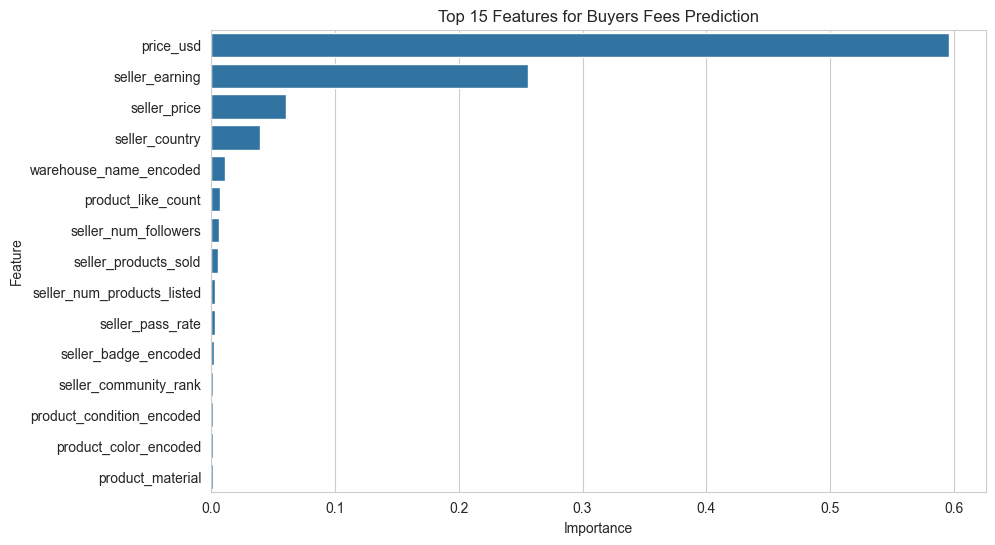

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare Data
# Drop irrelevant columns for training
excluded_cols = ['product_id', 'product_name', 'product_description', 'product_keywords',
                 'brand_name', 'brand_url', 'seller_username','brand_id', 'seller_id']

# Select features for training
X = df.drop(columns=excluded_cols + ['buyers_fees'])
y = df['buyers_fees']

# Keep only rows where 'buyers_fees' is not null
X = X[y.notnull()]
y = y[y.notnull()]

# Step 2: Fit Random Forest for Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Step 3: Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Display and plot feature importance
print(feature_importances)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('Top 15 Features for Buyers Fees Prediction')
plt.show()

# Step 4: KNN Imputation Using Top Features
# Select top 10 features
top_features = feature_importances.head(10)['Feature'].tolist()

# Scale the data (KNN works better with scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[top_features])

# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
imputed_values = knn_imputer.fit_transform(X_scaled)




In [31]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Step 4: KNN Imputation Using Top 10 Features
top_features = feature_importances.head(10)['Feature'].tolist()

# Scale the data for better KNN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[top_features])

# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
imputed_values = knn_imputer.fit_transform(X_scaled)

# Inverse transform to get back to original scale
imputed_scaled = scaler.inverse_transform(imputed_values)

# Identify rows where 'buyers_fees' is missing
missing_rows = df['buyers_fees'].isnull()

# Choose the best proxy feature (e.g., 'price_usd' if it's correlated)
proxy_feature = 'price_usd'  # Replace with your chosen feature

# Fill missing buyers_fees using the corresponding imputed value
df.loc[missing_rows, 'buyers_fees'] = imputed_scaled[missing_rows, top_features.index(proxy_feature)]


In [1]:
# drop product_color column
df.drop('product_color', axis=1, inplace=True)

NameError: name 'df' is not defined

In [32]:
print(df.isnull().sum())

product_id                       0
product_type                     0
product_name                     0
product_description              0
product_keywords                 0
product_like_count               0
sold                             0
reserved                         0
available                        0
in_stock                         0
should_be_gone                   0
brand_id                         0
brand_name                       0
brand_url                        0
product_material                 0
product_color                    0
price_usd                        0
seller_price                     0
seller_earning                   0
buyers_fees                      0
seller_id                        0
seller_username                  0
seller_country                   0
seller_products_sold             0
seller_num_products_listed       0
seller_community_rank            0
seller_num_followers             0
seller_pass_rate                 0
product_category_enc

In [34]:
# Save the cleaned DataFrame as a Parquet file
df.to_parquet('cleaned_data.parquet', index=False)

print("File saved successfully as 'cleaned_data.parquet'")


File saved successfully as 'cleaned_data.parquet'
